# problem statement
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


# loading dataset

In [2]:
dfchurn=pd.read_csv('customer_churn.csv')

In [3]:
dfchurn.shape

(7043, 21)

the dataset contains 7043 rows and 21 columns

In [5]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [6]:
dfchurn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
dfchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there are no null values

In [9]:
dfchurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are float 64, int and object datatypes

In [10]:
dfchurn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

customer_id can be dropped because it has all unique values

In [11]:
dfchurn.drop(["customerID"],axis=1,inplace=True)

# EDA

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

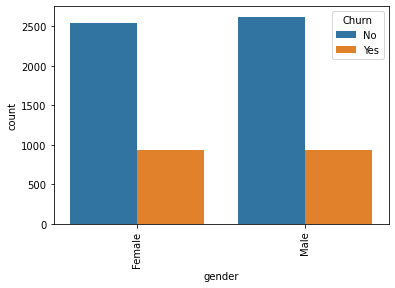

In [13]:
sns.countplot(dfchurn['gender'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

it can be seen that both male and female customers have equal amount of churn rate

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

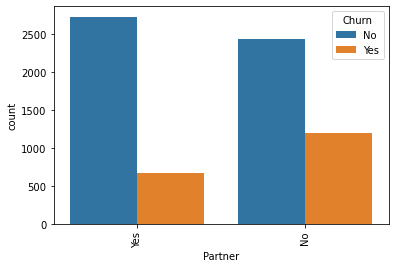

In [19]:
sns.countplot(dfchurn['Partner'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn rate is lower for partners

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

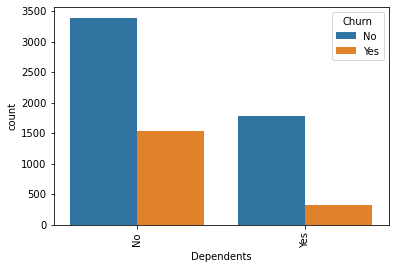

In [20]:
sns.countplot(dfchurn['Dependents'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn rate is lower for customers with dependents

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

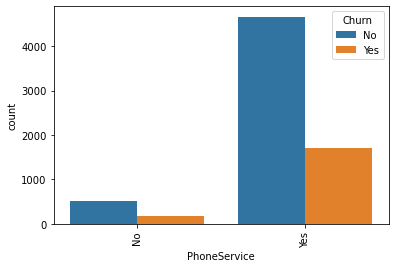

In [21]:
sns.countplot(dfchurn['PhoneService'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn is higher for customers with phone service

(array([0, 1, 2]),
 [Text(0, 0, 'No phone service'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

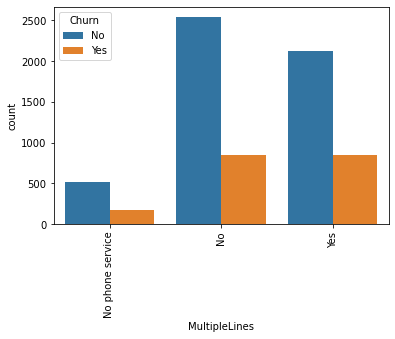

In [22]:
sns.countplot(dfchurn['MultipleLines'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn rate is equal for customers with or without phone service

(array([0, 1, 2]),
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

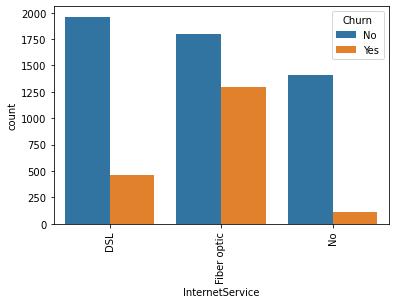

In [23]:
sns.countplot(dfchurn['InternetService'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn is higher for customer with fiber optic service

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

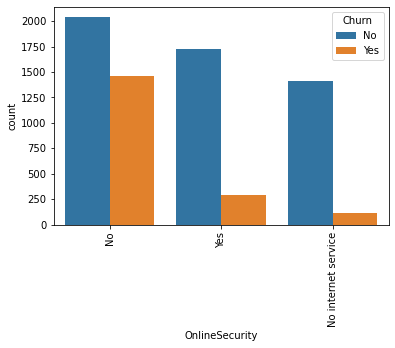

In [24]:
sns.countplot(dfchurn['OnlineSecurity'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn is higher for customers with no online security

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

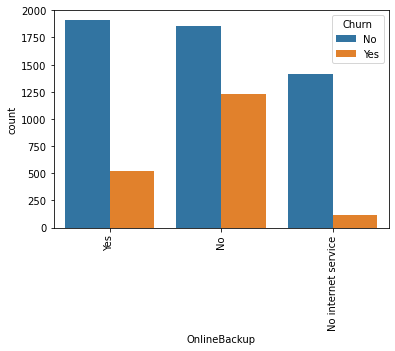

In [25]:
sns.countplot(dfchurn['OnlineBackup'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn is higher for ones with no online backup

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

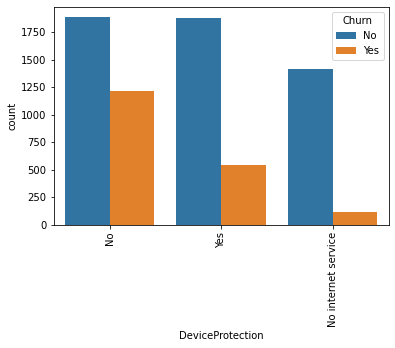

In [26]:
sns.countplot(dfchurn['DeviceProtection'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn is higher for customers with no device protection

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

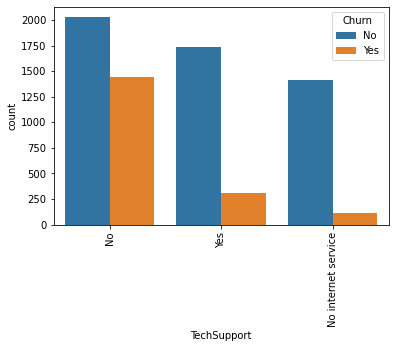

In [27]:
sns.countplot(dfchurn['TechSupport'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

it is higher with no tech support

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

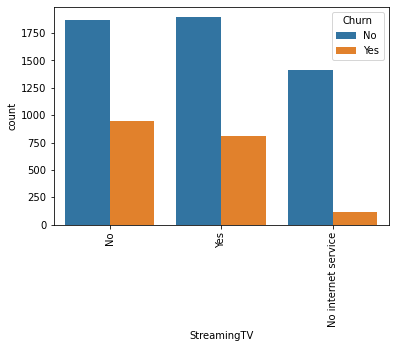

In [28]:
sns.countplot(dfchurn['StreamingTV'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

it is higher with no TV streaming

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

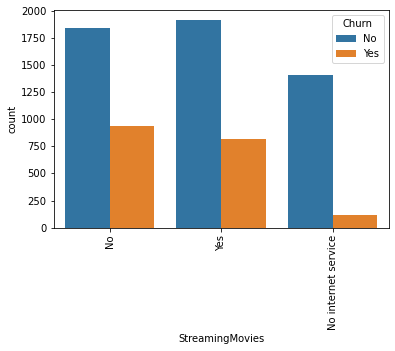

In [29]:
sns.countplot(dfchurn['StreamingMovies'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

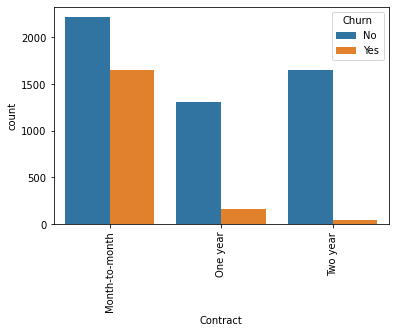

In [30]:
sns.countplot(dfchurn['Contract'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

churn rate is highest for customers with month to month contarct

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

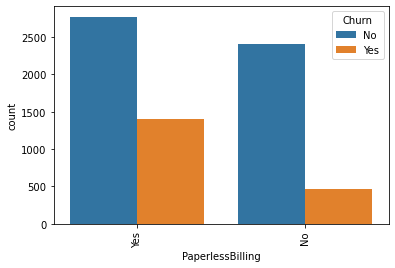

In [31]:
sns.countplot(dfchurn['PaperlessBilling'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

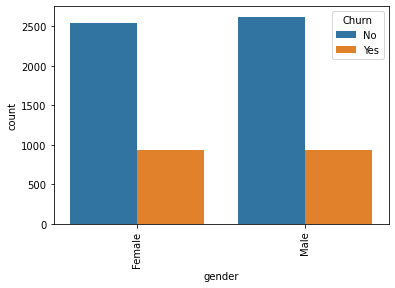

In [32]:
sns.countplot(dfchurn['gender'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

it is equal for both gender

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

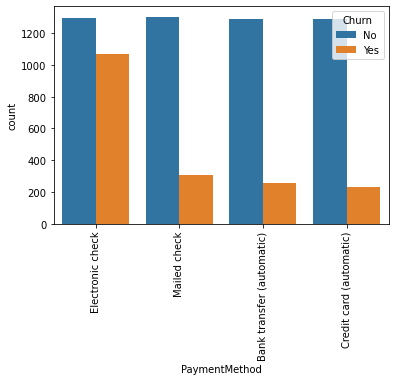

In [33]:
sns.countplot(dfchurn['PaymentMethod'],hue=dfchurn['Churn'])
plt.xticks(rotation=90)

it is highest for customers paying through electronic check

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

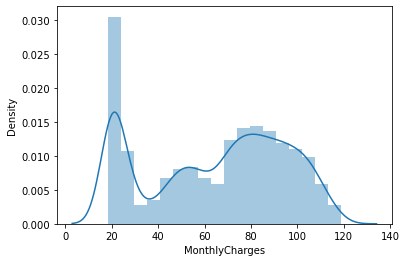

In [37]:
sns.distplot(dfchurn['MonthlyCharges'])


<AxesSubplot:xlabel='tenure', ylabel='Density'>

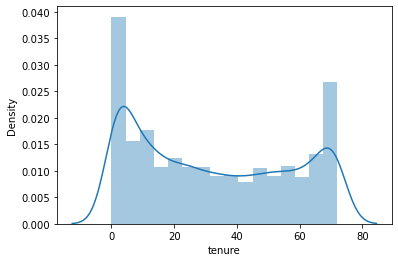

In [38]:
sns.distplot(dfchurn['tenure'])


# label encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
list=['gender','Partner','Dependents','PhoneService','MultipleLines',    
'InternetService',      
'OnlineSecurity',       
'OnlineBackup',         
'DeviceProtection',
'TechSupport',         
'StreamingTV',          
'StreamingMovies',      
'Contract',             
'PaperlessBilling',     
'PaymentMethod',       
'TotalCharges',         
'Churn']
for i in list:
    dfchurn[i]=le.fit_transform(dfchurn[i])

## Boxplot

gender                 AxesSubplot(0.125,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
MultipleLines       AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
InternetService        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingMovies     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
Contract            

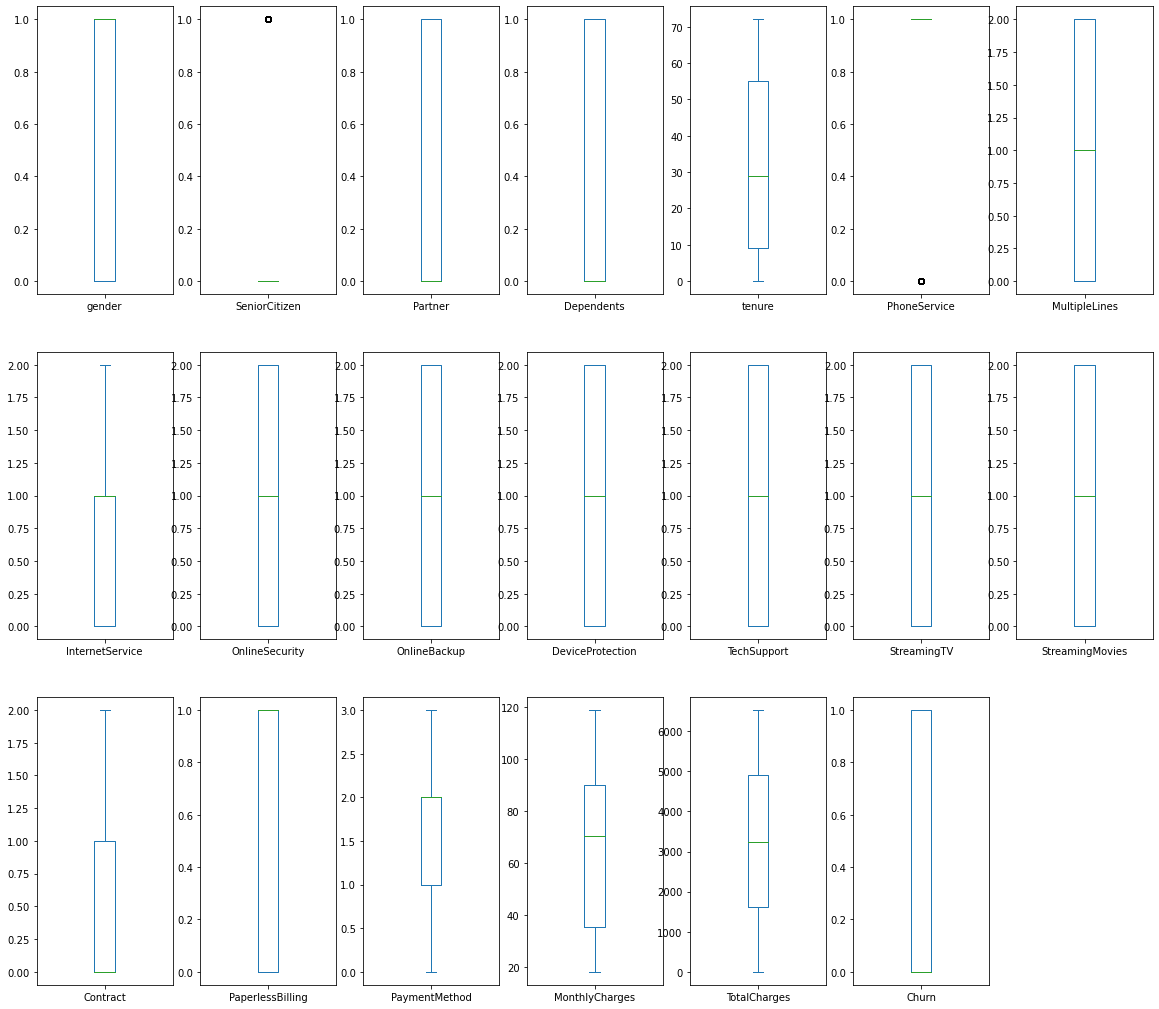

In [46]:
dfchurn.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,18))

very less outliers are present

# descriptive statistics

In [48]:
dfchurn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


very less outliers are present

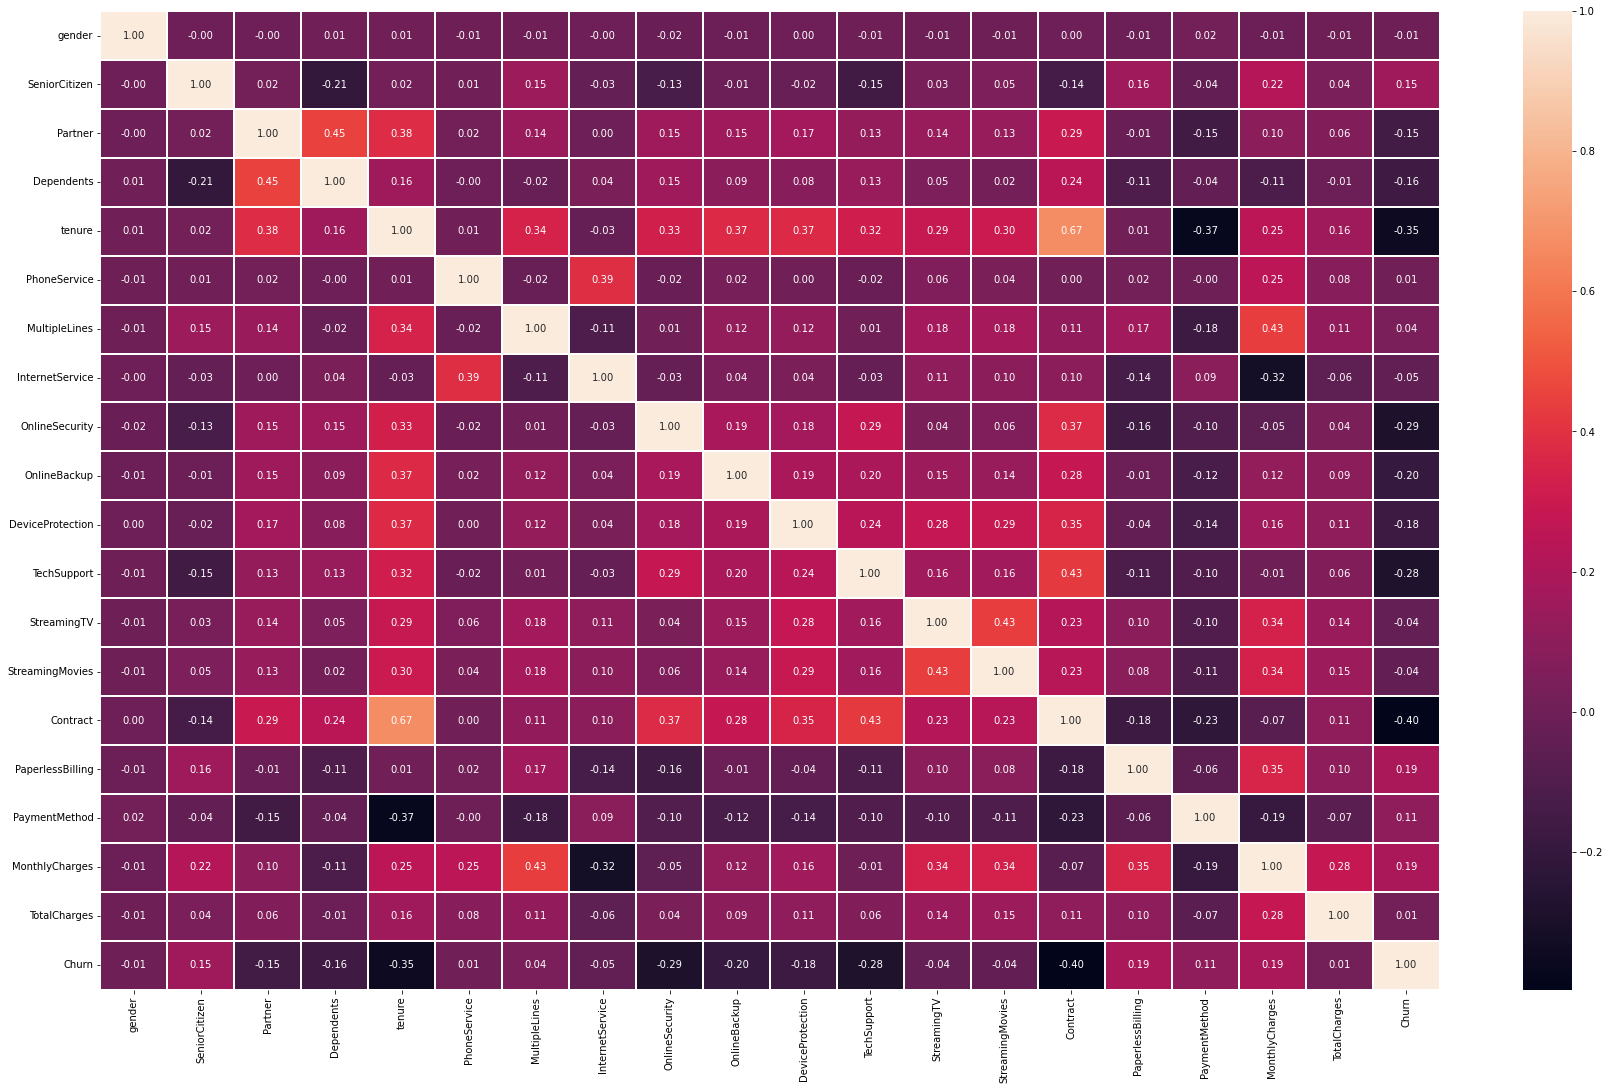

In [49]:
plt.figure(figsize=(30,18))
sns.heatmap(dfchurn.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [51]:
dfchurn.corr()["Churn"].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

no multicollinearity is present

we can drop the gender as it has 0.8% correlation

In [52]:
dfchurn.drop(['gender'],axis=1,inplace=True)

# outlier removal

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(dfchurn))

In [55]:
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [57]:
dfnew=dfchurn[(z<3).all(axis=1)]

In [58]:
dfnew.shape

(6361, 19)

In [59]:
dfchurn.shape

(7043, 19)

% data loss=(7043-6361)/7043*100=9.6%

In [53]:
dfchurn["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
for better accuracy we need to bala

# Balancing data using SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [61]:
x=dfnew.drop(["Churn"],axis=1)
y=dfnew["Churn"]

In [62]:
trainx,trainy=smt.fit_resample(x,y)

In [63]:
trainx.shape

(9324, 18)

In [64]:
trainy.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

# skewness¶

In [65]:
trainx.skew().sort_values()

MonthlyCharges     -0.625224
PaperlessBilling   -0.389027
PaymentMethod      -0.214136
TotalCharges       -0.012781
PhoneService        0.000000
InternetService     0.087765
StreamingMovies     0.145080
StreamingTV         0.145254
MultipleLines       0.192668
DeviceProtection    0.469989
OnlineBackup        0.477280
Partner             0.502101
tenure              0.511662
TechSupport         0.798889
OnlineSecurity      0.832947
Contract            1.156292
Dependents          1.397511
SeniorCitizen       2.148372
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform

In [68]:
dft=trainx

In [69]:
trainx=power_transform(trainx,method='yeo-johnson')

In [70]:
xx=pd.DataFrame(data=trainx,columns=dft.columns)

In [71]:
xx.skew().sort_values()

PaperlessBilling   -0.389027
MonthlyCharges     -0.358567
TotalCharges       -0.293841
PaymentMethod      -0.193016
tenure             -0.158474
InternetService    -0.082981
StreamingTV        -0.028067
StreamingMovies    -0.027779
PhoneService        0.000000
MultipleLines       0.135711
DeviceProtection    0.175217
OnlineBackup        0.179434
TechSupport         0.408582
OnlineSecurity      0.436389
Partner             0.502101
Contract            0.771900
Dependents          1.397511
SeniorCitizen       2.148372
dtype: float64

# standard scaler

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [73]:
dfx=sc.fit_transform(xx)

In [74]:
dfx.mean()

-5.715433846204152e-18

# application of machine learning models

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [77]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.7916368834882058
at random state 0, confusion matrix is [[ 988  420]
 [ 163 1227]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.70      0.77      1408
           1       0.74      0.88      0.81      1390

    accuracy                           0.79      2798
   macro avg       0.80      0.79      0.79      2798
weighted avg       0.80      0.79      0.79      2798



at random state 1,  accuracy score is 0.7852037169406719
at random state 1, confusion matrix is [[1015  417]
 [ 184 1182]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.85      0.71      0.77      1432
           1       0.74      0.87      0.80      1366

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.78      2798
weighted avg       0.79      0.79      0.78      2798



at rando

at random state 17,  accuracy score is 0.7812723373838456
at random state 17, confusion matrix is [[ 997  416]
 [ 196 1189]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1413
           1       0.74      0.86      0.80      1385

    accuracy                           0.78      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at random state 18,  accuracy score is 0.7827019299499642
at random state 18, confusion matrix is [[ 976  418]
 [ 190 1214]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.84      0.70      0.76      1394
           1       0.74      0.86      0.80      1404

    accuracy                           0.78      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at

at random state 34,  accuracy score is 0.7962830593280915
at random state 34, confusion matrix is [[1018  378]
 [ 192 1210]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1396
           1       0.76      0.86      0.81      1402

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at random state 35,  accuracy score is 0.7834167262330236
at random state 35, confusion matrix is [[ 996  396]
 [ 210 1196]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1392
           1       0.75      0.85      0.80      1406

    accuracy                           0.78      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at

at random state 51,  accuracy score is 0.7873481057898499
at random state 51, confusion matrix is [[1041  389]
 [ 206 1162]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1430
           1       0.75      0.85      0.80      1368

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 52,  accuracy score is 0.7880629020729092
at random state 52, confusion matrix is [[1005  353]
 [ 240 1200]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1358
           1       0.77      0.83      0.80      1440

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at

at random state 68,  accuracy score is 0.7827019299499642
at random state 68, confusion matrix is [[ 984  433]
 [ 175 1206]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.85      0.69      0.76      1417
           1       0.74      0.87      0.80      1381

    accuracy                           0.78      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at random state 69,  accuracy score is 0.7709077912794854
at random state 69, confusion matrix is [[1006  440]
 [ 201 1151]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1446
           1       0.72      0.85      0.78      1352

    accuracy                           0.77      2798
   macro avg       0.78      0.77      0.77      2798
weighted avg       0.78      0.77      0.77      2798



at

at random state 85,  accuracy score is 0.7959256611865618
at random state 85, confusion matrix is [[1015  366]
 [ 205 1212]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1381
           1       0.77      0.86      0.81      1417

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.79      2798
weighted avg       0.80      0.80      0.80      2798



at random state 86,  accuracy score is 0.7841315225160829
at random state 86, confusion matrix is [[ 963  412]
 [ 192 1231]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1375
           1       0.75      0.87      0.80      1423

    accuracy                           0.78      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at

CV score

In [82]:
score=cross_val_score(knn,dfx,trainy,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.73670669 0.73070326 0.73070326 0.81903945 0.80772532 0.80343348
 0.82832618 0.8111588 ]
0.7834745544357659
0.039978522812136014


# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.8005718370264474
at random state 0, confusion matrix is [[1128  280]
 [ 278 1112]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1408
           1       0.80      0.80      0.80      1390

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at random state 1,  accuracy score is 0.7834167262330236
at random state 1, confusion matrix is [[1103  329]
 [ 277 1089]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.78      1432
           1       0.77      0.80      0.78      1366

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at rando

at random state 18, confusion matrix is [[1092  302]
 [ 276 1128]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1394
           1       0.79      0.80      0.80      1404

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 19,  accuracy score is 0.7877055039313795
at random state 19, confusion matrix is [[1095  304]
 [ 290 1109]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1399
           1       0.78      0.79      0.79      1399

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 20,  accuracy score is 0.7898498927805575
at

at random state 37,  accuracy score is 0.7880629020729092
at random state 37, confusion matrix is [[1117  305]
 [ 288 1088]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1422
           1       0.78      0.79      0.79      1376

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 38,  accuracy score is 0.7987848463187991
at random state 38, confusion matrix is [[1139  298]
 [ 265 1096]]
at random state 38, classification report is               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1437
           1       0.79      0.81      0.80      1361

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at

at random state 57,  accuracy score is 0.7941386704789135
at random state 57, confusion matrix is [[1111  328]
 [ 248 1111]]
at random state 57, classification report is               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1439
           1       0.77      0.82      0.79      1359

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.80      0.79      0.79      2798



at random state 58,  accuracy score is 0.8009292351679771
at random state 58, confusion matrix is [[1124  304]
 [ 253 1117]]
at random state 58, classification report is               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1428
           1       0.79      0.82      0.80      1370

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at

at random state 74, confusion matrix is [[1119  279]
 [ 314 1086]]
at random state 74, classification report is               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1398
           1       0.80      0.78      0.79      1400

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 75,  accuracy score is 0.781987133666905
at random state 75, confusion matrix is [[1085  317]
 [ 293 1103]]
at random state 75, classification report is               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1402
           1       0.78      0.79      0.78      1396

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at random state 76,  accuracy score is 0.7902072909220872
at 

at random state 92, confusion matrix is [[1093  332]
 [ 277 1096]]
at random state 92, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.78      1425
           1       0.77      0.80      0.78      1373

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at random state 93,  accuracy score is 0.7812723373838456
at random state 93, confusion matrix is [[1072  306]
 [ 306 1114]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1378
           1       0.78      0.78      0.78      1420

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at random state 94,  accuracy score is 0.8070050035739814
at

In [89]:
score=cross_val_score(dtc,dfx,trainy,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.69305019 0.70592021 0.81917632 0.83976834 0.84362934 0.84105534]
0.7904332904332905
0.06490820439779385


# RandomForestClassifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8523945675482487
at random state 0, confusion matrix is [[1182  226]
 [ 187 1203]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1408
           1       0.84      0.87      0.85      1390

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at random state 1,  accuracy score is 0.8359542530378842
at random state 1, confusion matrix is [[1181  251]
 [ 208 1158]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1432
           1       0.82      0.85      0.83      1366

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798



at rando

at random state 17,  accuracy score is 0.8413152251608291
at random state 17, confusion matrix is [[1197  216]
 [ 228 1157]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1413
           1       0.84      0.84      0.84      1385

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798



at random state 18,  accuracy score is 0.8545389563974267
at random state 18, confusion matrix is [[1190  204]
 [ 203 1201]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1394
           1       0.85      0.86      0.86      1404

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at

at random state 34,  accuracy score is 0.8502501786990707
at random state 34, confusion matrix is [[1193  203]
 [ 216 1186]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1396
           1       0.85      0.85      0.85      1402

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at random state 35,  accuracy score is 0.8345246604717655
at random state 35, confusion matrix is [[1184  208]
 [ 255 1151]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1392
           1       0.85      0.82      0.83      1406

    accuracy                           0.83      2798
   macro avg       0.83      0.83      0.83      2798
weighted avg       0.83      0.83      0.83      2798



at

at random state 51,  accuracy score is 0.8513223731236598
at random state 51, confusion matrix is [[1218  212]
 [ 204 1164]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1430
           1       0.85      0.85      0.85      1368

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at random state 52,  accuracy score is 0.8495353824160115
at random state 52, confusion matrix is [[1184  174]
 [ 247 1193]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1358
           1       0.87      0.83      0.85      1440

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at

at random state 68,  accuracy score is 0.8488205861329521
at random state 68, confusion matrix is [[1196  221]
 [ 202 1179]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1417
           1       0.84      0.85      0.85      1381

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at random state 69,  accuracy score is 0.8506075768406004
at random state 69, confusion matrix is [[1215  231]
 [ 187 1165]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1446
           1       0.83      0.86      0.85      1352

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798



at

at random state 85,  accuracy score is 0.8552537526804861
at random state 85, confusion matrix is [[1184  197]
 [ 208 1209]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1381
           1       0.86      0.85      0.86      1417

    accuracy                           0.86      2798
   macro avg       0.86      0.86      0.86      2798
weighted avg       0.86      0.86      0.86      2798



at random state 86,  accuracy score is 0.8391708363116511
at random state 86, confusion matrix is [[1138  237]
 [ 213 1210]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1375
           1       0.84      0.85      0.84      1423

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798



at

CV SCORE

In [94]:
score=cross_val_score(rf,dfx,trainy,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.72469983 0.74356775 0.75214408 0.91766724 0.89098712 0.90128755
 0.91158798 0.90901288]
0.8438693048388166
0.08098446241258157


# logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.7912794853466762
at random state 0, confusion matrix is [[1059  349]
 [ 235 1155]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1408
           1       0.77      0.83      0.80      1390

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at random state 1,  accuracy score is 0.7844889206576126
at random state 1, confusion matrix is [[1079  353]
 [ 250 1116]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1432
           1       0.76      0.82      0.79      1366

    accuracy                           0.78      2798
   macro avg       0.79      0.79      0.78      2798
weighted avg       0.79      0.78      0.78      2798



at rando

at random state 24,  accuracy score is 0.7980700500357398
at random state 24, confusion matrix is [[1043  317]
 [ 248 1190]]
at random state 24, classification report is               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1360
           1       0.79      0.83      0.81      1438

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at random state 25,  accuracy score is 0.7916368834882058
at random state 25, confusion matrix is [[1065  339]
 [ 244 1150]]
at random state 25, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.79      1404
           1       0.77      0.82      0.80      1394

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at



at random state 47,  accuracy score is 0.8002144388849178
at random state 47, confusion matrix is [[1110  335]
 [ 224 1129]]
at random state 47, classification report is               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1445
           1       0.77      0.83      0.80      1353

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at random state 48,  accuracy score is 0.7991422444603288
at random state 48, confusion matrix is [[1053  351]
 [ 211 1183]]
at random state 48, classification report is               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1404
           1       0.77      0.85      0.81      1394

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798





at random state 66,  accuracy score is 0.7802001429592567
at random state 66, confusion matrix is [[1018  366]
 [ 249 1165]]
at random state 66, classification report is               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1384
           1       0.76      0.82      0.79      1414

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at random state 67,  accuracy score is 0.7998570407433881
at random state 67, confusion matrix is [[1082  286]
 [ 274 1156]]
at random state 67, classification report is               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1368
           1       0.80      0.81      0.81      1430

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



at

at random state 87,  accuracy score is 0.7830593280914939
at random state 87, confusion matrix is [[1049  337]
 [ 270 1142]]
at random state 87, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1386
           1       0.77      0.81      0.79      1412

    accuracy                           0.78      2798
   macro avg       0.78      0.78      0.78      2798
weighted avg       0.78      0.78      0.78      2798



at random state 88,  accuracy score is 0.7852037169406719
at random state 88, confusion matrix is [[1056  331]
 [ 270 1141]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      1387
           1       0.78      0.81      0.79      1411

    accuracy                           0.79      2798
   macro avg       0.79      0.79      0.79      2798
weighted avg       0.79      0.79      0.79      2798



at

CV score

In [97]:
score=cross_val_score(lg,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74101877 0.75549598 0.81286863 0.81447721 0.81545064]
0.7878622467178312
0.03267011566733086


The Random Forest Classifier gives maximum accuracy and minimum diference with CV score

# Hyperparameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [109]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[12,15,17],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [110]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=8)

In [111]:
gd.fit(dfx,trainy)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [112]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [113]:
gd.best_score_

0.8466555076229949

# building the final model

In [114]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='sqrt',max_depth=17,criterion="gini",n_estimators=200)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.8334524660471766
Confusion matrix:-- [[1173  272]
 [ 194 1159]]
classification report:--               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1445
           1       0.81      0.86      0.83      1353

    accuracy                           0.83      2798
   macro avg       0.83      0.83      0.83      2798
weighted avg       0.83      0.83      0.83      2798





# AUCROC score

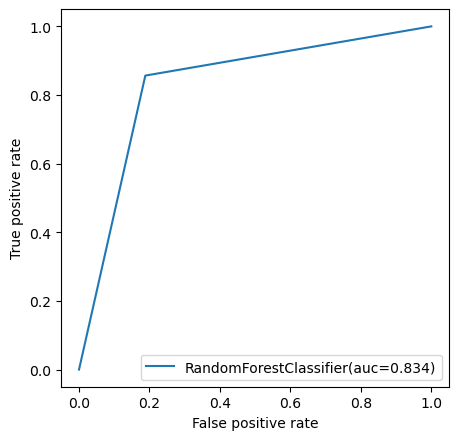

In [115]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Auc score is 83%

# prediction

In [116]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [117]:
dfpred.sample(40)

,Expected,Predicted
5256,0,0
785,0,0
8813,1,1
3052,0,0
1624,0,0
1916,0,0
996,0,0
104,1,1
5737,0,0
6103,0,0


# model saving

In [118]:
import pickle
filename="customer_churn_analysis.pkl"
pickle.dump(rf,open(filename,'wb'))